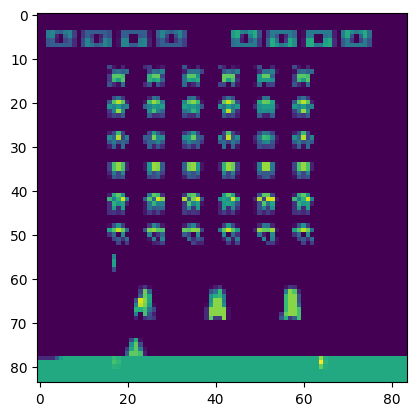

In [44]:
import numpy as np
import gym
import matplotlib.pyplot as plt
from gym.wrappers import AtariPreprocessing, LazyFrames, FrameStack
env = gym.make("SpaceInvadersNoFrameskip-v4")
env = AtariPreprocessing(env,
                         scale_obs=False,
                         terminal_on_life_loss=True,
                         )
env = FrameStack(env, num_stack=4)
FIRE_ACTION = 1
RIGHT_ACTION = 2
LEFT_ACTION = 3

n_actions = env.action_space.n
state_dim = env.observation_space.shape

# env.render()
test = env.reset()
for i in range(100):
    test = env.step(env.action_space.sample())[0]

plt.imshow(test.__array__()[0,...])

In [46]:
state_dim, n_actions

((4, 84, 84), 6)

In [38]:
import torch
(torch.from_numpy(observation.__array__())[None]/255).shape

torch.Size([1, 210, 160, 3])

In [13]:
n_states = env.observation_space.shape[0]
n_actions = env.action_space.n

In [16]:
import cv2

def prepro(I):
  """prepro 210x160x3 frame into 168x168, then downscale to 84x84 1D float vector"""
  I = I[27:195] # crop to 168x160
  I = I[:,:,0]  # Convert to grayscale by taking one channel

  # Add 4 black pixels on each side to make it 168x168
  I = cv2.copyMakeBorder(I, 0, 0, 4, 4, cv2.BORDER_CONSTANT, value=0)

  # Downscale to 84x84
  I = cv2.resize(I, (84, 84), interpolation=cv2.INTER_AREA)

  I[I == 0] = 0 # You may need to change this value based on the actual background color in Space Invaders
  I[I != 0] = 1  # Set all other (non-zero) pixels to 1

  return I.astype(np.float).ravel()

/tmp/ipykernel_2092812/1284354069.py:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return I.astype(np.float).ravel()


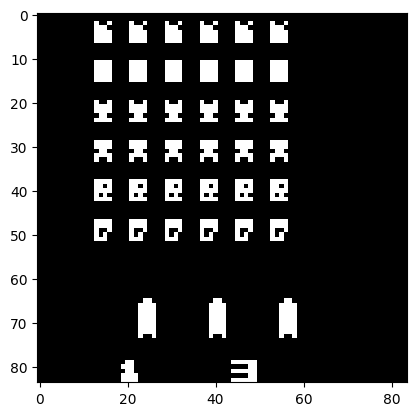

In [17]:
obs_preprocessed = prepro(observation).reshape(84, 84)
plt.imshow(obs_preprocessed, cmap='gray')
plt.show()

In [24]:
n_states = env.observation_space.shape[0]
n_actions = env.action_space.n

In [25]:
n_states

210

In [26]:
n_actions

6

/tmp/ipykernel_2092812/1284354069.py:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return I.astype(np.float).ravel()


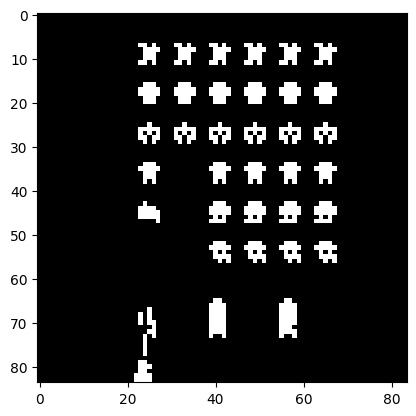

In [18]:
# Number of steps you want to play
num_steps = 500

env.reset()

for _ in range(num_steps):
    action = env.action_space.sample()  # Taking random actions
    observation, _, _, _ = env.step(action)

# Preprocess the final observation
obs_preprocessed = prepro(observation).reshape(84, 84)

# Show preprocessed observation
plt.imshow(obs_preprocessed, cmap='gray')
plt.show()

In [23]:
obs_preprocessed[-1,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])